<a href="https://colab.research.google.com/github/vesran/15-puzzle-game/blob/master/Deep_Learning/Keras_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras 101 & Overfitting

* API accessible via Tensorflow
* Build various deep learning architecture

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## XOR example

* Keras can represents sequential models (1 input --> 1 output) using *tf.keras.Sequential()*
* Define an optimizer from *tf.keras.optimizer* 
* Add layers from *tf.keras.layers*
* Compile model -> Train model -> Evaluate model

In [ ]:
# XOR : needs at least one hidden layer

# Data
X = np.array([ [0., 0.], [1., 0.], [0., 1.], [1., 1.] ])
y = np.array([ [0.], [1.], [1.], [0.] ])

# Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))  # Hidden layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Train model
sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])
model.fit(X, y, epochs=1000, batch_size=1, verbose=0)

# Prediction
model.predict(X)

array([[0.00699428],
       [0.9985515 ],
       [0.99853104],
       [0.00699428]], dtype=float32)

## MNIST example

* Keras allows users to download remote datasets (like MNIST...) using *tf.keras.datasets* and method *.load_data()*.
* For multiclass classification, it can be useful to convert raw labels as categories (one-hot encoding) : *tf.keras.utils.to_categorical(labels, num_clssses) and use *softmax* as final activation function.

In [ ]:
# Download data

num_classes = 10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize
X_train = train_images / 255.0
X_test = test_images / 255.0

# Flatten
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape(10000, 28*28)

# Encode
y_train = tf.keras.utils.to_categorical(train_labels, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=10, batch_size=128,verbose=1)
loss, acc = model.evaluate(X_test, y_test)
print(f'Test model : Loss : {loss} | Accuracy : {acc}')

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.0996 - acc: 0.7564
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5197 - acc: 0.8732
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4184 - acc: 0.8900
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3728 - acc: 0.8989
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3448 - acc: 0.9054
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3249 - acc: 0.9100
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3095 - acc: 0.9137
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2967 - acc: 0.9175
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2858 - acc: 0.9205
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2606 - acc: 0.9267
Test model : Loss : 0.26064151525497437 | Accurac

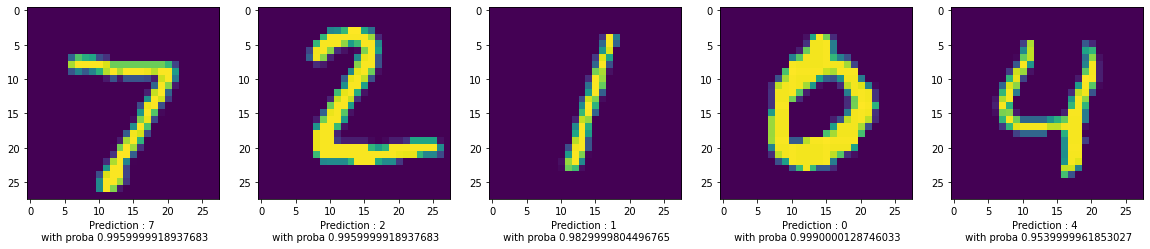

In [ ]:
# Display predictions
_, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(np.ravel(axs)):
  ax.imshow(test_images[i])
  probas = model.predict(X_test[i].reshape(-1, 28*28))  # Reshape because model takes batches as input
  predicted_class = np.argmax(probas)
  ax.set_xlabel(f"Prediction : {predicted_class} \n with proba {round(np.max(probas), 3)}")

* Predictions are accurate and the model is confident on this test sample.

What about the incorrect predictions ?

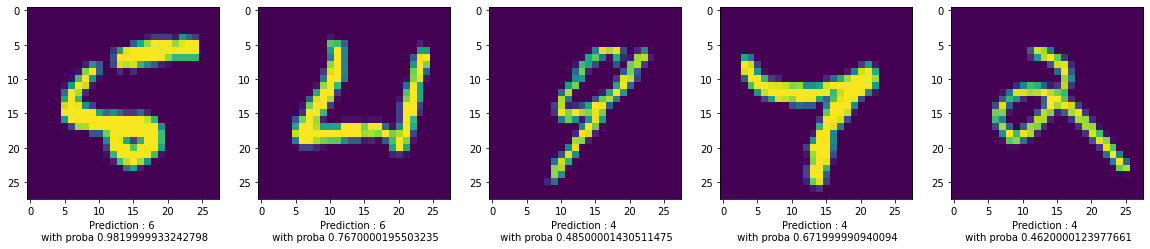

In [ ]:
# Find incorrect predictions
num = 5
incorrects_idx = []
for i, x, y in zip(range(len(X_test)), X_test, test_labels):
  y_pred = model.predict(x.reshape(-1, 28*28))
  if np.argmax(y_pred) != y:
    incorrects_idx.append(i)
    
  if len(incorrects_idx) == num:
    break

assert len(incorrects) == num  # Is there enough incorrect predictions ?


# Plot incorrect predictions
_, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(np.ravel(axs)):
  ax.imshow(test_images[incorrects_idx[i]])
  probas = model.predict(X_test[incorrects_idx[i]].reshape(-1, 28*28))  # Reshape because model takes batches as input
  predicted_class = np.argmax(probas)
  ax.set_xlabel(f"Prediction : {predicted_class} \n with proba {round(np.max(probas), 3)}")

* The model is not as confident as it used to be in the previous sample.
* These images are pretty confusing.



## IMDB example

* Data from IMDB : sentiment analysis
* We keep the 10000 most frequent words
* One-hot encoding gives a vector of size (1, 10000) with 1 if the word is in the raw data and 0 otherwise (duplicates words are not summed)
* *model.fit()* return a history of loss, acc... which can be plotted : *history.history['val_acc']*

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Turn inputs into an one-hot encoding format
X_train = np.zeros((25000, 10000))
X_test = np.zeros((25000, 10000))

for i in range(25000):
  X_train[i][train_data[i]] = 1.
  X_test[i][test_data[i]] = 1.

y_train = train_labels
y_test = test_labels

X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [36]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
epochs = 30
vanilla_history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=512)

Epoch 1/30
30/30 [==============================] - 1s 27ms/step - loss: 0.6816 - acc: 0.6109 - val_loss: 0.6651 - val_acc: 0.7036
Epoch 2/30
30/30 [==============================] - 1s 17ms/step - loss: 0.6427 - acc: 0.7603 - val_loss: 0.6254 - val_acc: 0.7711
Epoch 3/30
30/30 [==============================] - 1s 18ms/step - loss: 0.5984 - acc: 0.8193 - val_loss: 0.5851 - val_acc: 0.8143
Epoch 4/30
30/30 [==============================] - 1s 18ms/step - loss: 0.5569 - acc: 0.8444 - val_loss: 0.5499 - val_acc: 0.8308
Epoch 5/30
30/30 [==============================] - 1s 19ms/step - loss: 0.5197 - acc: 0.8586 - val_loss: 0.5187 - val_acc: 0.8400
Epoch 6/30
30/30 [==============================] - 1s 19ms/step - loss: 0.4865 - acc: 0.8691 - val_loss: 0.4899 - val_acc: 0.8505
Epoch 7/30
30/30 [==============================] - 1s 18ms/step - loss: 0.4557 - acc: 0.8748 - val_loss: 0.4638 - val_acc: 0.8572
Epoch 8/30
30/30 [==============================] - 1s 19ms/step - loss: 0.4278 - a

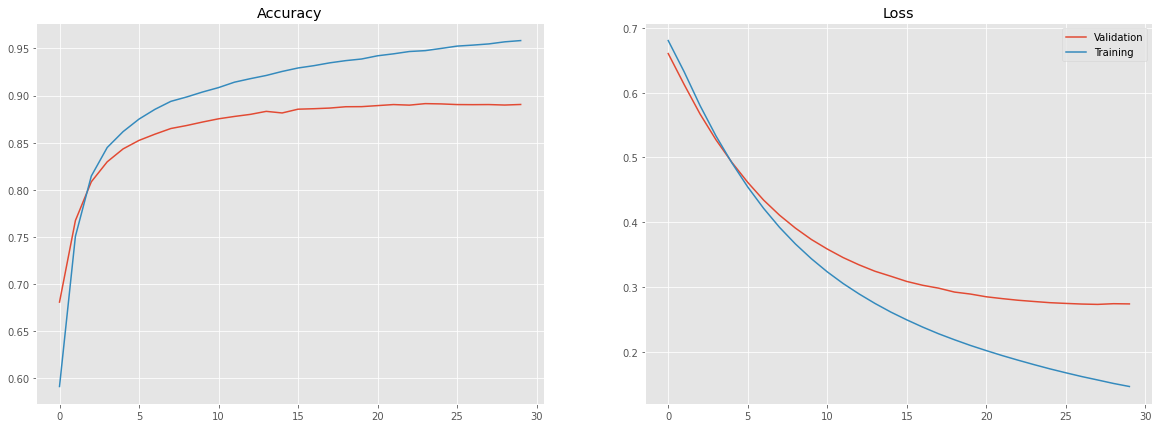

In [7]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(range(epochs), vanilla_history.history['val_acc'], label='Valildation')
ax[0].plot(range(epochs), vanilla_history.history['acc'], label='Training')
ax[0].set_title('Accuracy')

ax[1].plot(range(epochs), vanilla_history.history['val_loss'], label='Validation')
ax[1].plot(range(epochs), vanilla_history.history['loss'], label='Training')
ax[1].set_title('Loss')

plt.legend()

## Avoid overfitting

### Weights regularization

* *tf.keras.regularizers* : l2 / weight decay (generally 10e*4)
* Simple network to avoid overfitting : Occam's razor's principle
* Weights are the smallest possible -> modify loss



In [39]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000, ), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/30
118/118 [==============================] - 2s 14ms/step - loss: 0.7009 - acc: 0.6468 - val_loss: 0.6536 - val_acc: 0.7688
Epoch 2/30
118/118 [==============================] - 1s 10ms/step - loss: 0.5862 - acc: 0.8208 - val_loss: 0.5503 - val_acc: 0.8293
Epoch 3/30
118/118 [==============================] - 1s 10ms/step - loss: 0.4843 - acc: 0.8645 - val_loss: 0.4751 - val_acc: 0.8496
Epoch 4/30
118/118 [==============================] - 1s 10ms/step - loss: 0.4121 - acc: 0.8859 - val_loss: 0.4253 - val_acc: 0.8650
Epoch 5/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3613 - acc: 0.8989 - val_loss: 0.3903 - val_acc: 0.8734
Epoch 6/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3239 - acc: 0.9089 - val_loss: 0.3672 - val_acc: 0.8774
Epoch 7/30
118/118 [==============================] - 1s 10ms/step - loss: 0.2958 - acc: 0.9170 - val_loss: 0.3521 - val_acc: 0.8820
Epoch 8/30
118/118 [==============================] - 1s 10ms/step - 

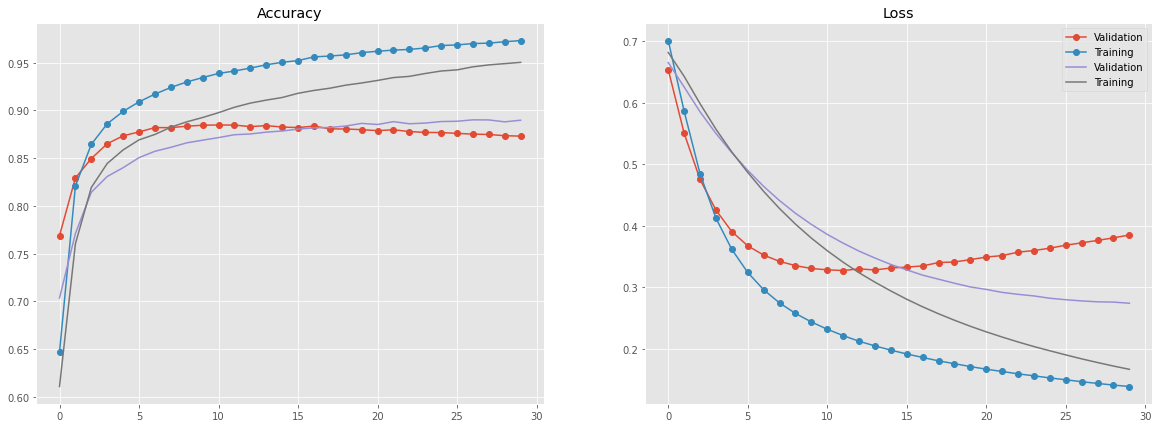

In [40]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(range(epochs), history.history['val_acc'], label='Valildation', marker='o')
ax[0].plot(range(epochs), history.history['acc'], label='Training', marker='o')
ax[0].set_title('Accuracy')

ax[1].plot(range(epochs), history.history['val_loss'], label='Validation', marker='o')
ax[1].plot(range(epochs), history.history['loss'], label='Training', marker='o')
ax[1].set_title('Loss')

ax[0].plot(range(epochs), vanilla_history.history['val_acc'], label='Valildation')
ax[0].plot(range(epochs), vanilla_history.history['acc'], label='Training')
ax[0].set_title('Accuracy')

ax[1].plot(range(epochs), vanilla_history.history['val_loss'], label='Validation')
ax[1].plot(range(epochs), vanilla_history.history['loss'], label='Training')
ax[1].set_title('Loss')

plt.legend()

* Reach accuracy peak faster
* On small datasets like IMDB's, the accuracy gain is very small unlike higher datasets
* The loss is higher with regularization on training data but should be lower in validation data (better in loss & accuracy)

### Dropout

* Randomly setting to 0 a percentage of output features from the previous layer
* Dropout value is generally in the range $[0.2, 0.5]$
* At test time, no dropout is applied : output values are scaled down by a factor equals to the dropout rate
* Works better on big NN
* Don't put it as entry/exit layer
* Reduce the effect of overfitting !

In [32]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000, ), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/30
118/118 [==============================] - 2s 15ms/step - loss: 0.8263 - acc: 0.5993 - val_loss: 0.7586 - val_acc: 0.7885
Epoch 2/30
118/118 [==============================] - 1s 11ms/step - loss: 0.7071 - acc: 0.7473 - val_loss: 0.6257 - val_acc: 0.8328
Epoch 3/30
118/118 [==============================] - 1s 12ms/step - loss: 0.5954 - acc: 0.8139 - val_loss: 0.5256 - val_acc: 0.8551
Epoch 4/30
118/118 [==============================] - 1s 11ms/step - loss: 0.5083 - acc: 0.8515 - val_loss: 0.4602 - val_acc: 0.8667
Epoch 5/30
118/118 [==============================] - 1s 11ms/step - loss: 0.4458 - acc: 0.8685 - val_loss: 0.4236 - val_acc: 0.8734
Epoch 6/30
118/118 [==============================] - 1s 12ms/step - loss: 0.4025 - acc: 0.8862 - val_loss: 0.3981 - val_acc: 0.8789
Epoch 7/30
118/118 [==============================] - 1s 11ms/step - loss: 0.3658 - acc: 0.8995 - val_loss: 0.3828 - val_acc: 0.8827
Epoch 8/30
118/118 [==============================] - 1s 12ms/step - 

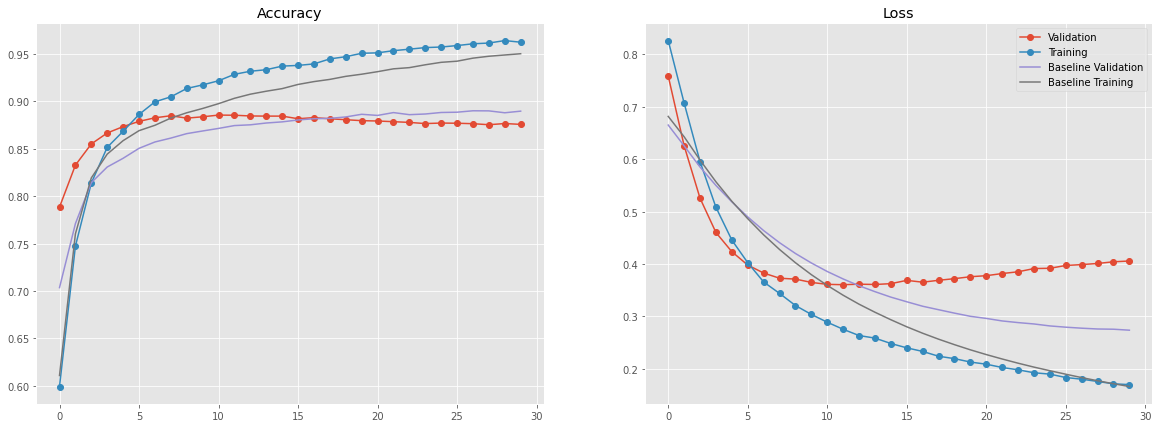

In [38]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(range(epochs), history.history['val_acc'], label='Valildation', marker='o')
ax[0].plot(range(epochs), history.history['acc'], label='Training', marker='o')
ax[0].set_title('Accuracy')

ax[1].plot(range(epochs), history.history['val_loss'], label='Validation', marker='o')
ax[1].plot(range(epochs), history.history['loss'], label='Training', marker='o')
ax[1].set_title('Loss')

ax[0].plot(range(epochs), vanilla_history.history['val_acc'], label='Baseline Valildation')
ax[0].plot(range(epochs), vanilla_history.history['acc'], label='Baseline Training')
ax[0].set_title('Accuracy')

ax[1].plot(range(epochs), vanilla_history.history['val_loss'], label='Baseline Validation')
ax[1].plot(range(epochs), vanilla_history.history['loss'], label='Baseline Training')
ax[1].set_title('Loss')

plt.legend()

### Recap to avoid overfitting

* Get more training data
* Reduce the capacity of the network : it forces the model to adopt a specific representation of the data and generalize better
* Add weights regularization
* Add dropout